# Simple RNN

## Step 1: Load the data

Let's create some data.  In this case, we have a sequence $X = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]$. 

We are to predict the next number of the sequence. 

In [48]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
sequence = [1,2,3,4,5,4,3,2,1,2,3,4,5,4,3,2,1]

print("Length of sequence is", len(sequence))

Length of sequence is 17


## Step 2: Build the model

Inputing data is same as Autoregressive RNN.  The data is created by we use the window of size $T = 3$.  

In [50]:
X = []
y = []
T = 3

for i in range(len(sequence) - T):
    X.append(list(sequence[i:i+T]))
    y.append(sequence[i+T])
    
X = np.array(X)
y = np.array(y)

In [51]:
N = len(X)
print(N, len(y))

14 14


Change the data set in form of $N \times T \times D$.  

In [52]:
X = X.reshape(-1,T,1)
print(X.shape)

(14, 3, 1)


In [53]:
X

array([[[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [4]],

       [[5],
        [4],
        [3]],

       [[4],
        [3],
        [2]],

       [[3],
        [2],
        [1]],

       [[2],
        [1],
        [2]],

       [[1],
        [2],
        [3]],

       [[2],
        [3],
        [4]],

       [[3],
        [4],
        [5]],

       [[4],
        [5],
        [4]],

       [[5],
        [4],
        [3]],

       [[4],
        [3],
        [2]]])

In [54]:
y

array([4, 5, 4, 3, 2, 1, 2, 3, 4, 5, 4, 3, 2, 1])

From given data $X = \{x_1, x_2, x_3, \dots, x_{14}\}$, we have 
 

$h_{last}$ = np.zeros(M) This is $1 \times M$ matrix.  

for t in range(T):  
$\hskip 10pt h_t = \sigma(W_{xh}^Tx_t + W_{hh}^Th_{last} + b_h)$  
$\hskip 10pt \hat{y}_t = \sigma(W_0^Th_t + b_0)$  
$\hskip 10pt h_{last} = h_t$

 
 
Let $M = 5$ and $K = 1$. 

$x_t$: an input.   $1 \times D = 1 \times 1$.  
$W_{Xh}$: a matrix from input layer to hidden layer.  $D \times M = 1 \times 5$.  
$W_{hh}$: a matrix from hidden layer to hidden layer.  $M \times M = 5 \times 5$   
$b_h$: constants in hidden layer.  $M \times 1$.  
$W_0$: a matrix from hidden layer to output layer.  $M \times K = 5 \times 1$.  
$b_0$: constant in output layer $K \times 1$.  
$h_t$: $1 \times M$.  
$\hat{y}_t$: $1 \times K$ matrix.  

In [55]:
X[0].shape

(3, 1)

In [56]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [57]:
T = 3
M = 5
K = 1

In [58]:
i = Input(shape = (T,1))
x = SimpleRNN(M, activation = 'tanh')(i)
x = Dense(K)(x)

model = Model(i,x)

## Step 3: Train model

In [59]:
model.compile(loss = 'mse', optimizer = Adam(lr = 0.001))

In [60]:
r = model.fit(X,y, epochs = 3000)

Epoch 1/3000
1/1 [==============================] - 0s 533us/step - loss: 2.5248
Epoch 2/3000
1/1 [==============================] - 0s 998us/step - loss: 2.5107
Epoch 3/3000
1/1 [==============================] - 0s 997us/step - loss: 2.4968
Epoch 4/3000
1/1 [==============================] - 0s 999us/step - loss: 2.4831
Epoch 5/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.4695
Epoch 6/3000
1/1 [==============================] - 0s 997us/step - loss: 2.4560
Epoch 7/3000
1/1 [==============================] - 0s 998us/step - loss: 2.4427
Epoch 8/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.4295
Epoch 9/3000
1/1 [==============================] - 0s 996us/step - loss: 2.4165
Epoch 10/3000
1/1 [==============================] - 0s 998us/step - loss: 2.4036
Epoch 11/3000
1/1 [==============================] - 0s 997us/step - loss: 2.3908
Epoch 12/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3782
Epoch 13/3000
1/1 [============

1/1 [==============================] - 0s 998us/step - loss: 1.5907
Epoch 102/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.5832
Epoch 103/3000
1/1 [==============================] - 0s 996us/step - loss: 1.5758
Epoch 104/3000
1/1 [==============================] - 0s 998us/step - loss: 1.5683
Epoch 105/3000
1/1 [==============================] - 0s 997us/step - loss: 1.5608
Epoch 106/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.5533
Epoch 107/3000
1/1 [==============================] - 0s 996us/step - loss: 1.5458
Epoch 108/3000
1/1 [==============================] - 0s 998us/step - loss: 1.5383
Epoch 109/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.5307
Epoch 110/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.5232
Epoch 111/3000
1/1 [==============================] - 0s 997us/step - loss: 1.5157
Epoch 112/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.5081
Epoch 113/3000
1/1 [=========

1/1 [==============================] - 0s 995us/step - loss: 0.9760
Epoch 201/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9721
Epoch 202/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9682
Epoch 203/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.9644
Epoch 204/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.9606
Epoch 205/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.9569
Epoch 206/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9531
Epoch 207/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9494
Epoch 208/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.9457
Epoch 209/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9421
Epoch 210/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9384
Epoch 211/3000
1/1 [==============================] - 0s 997us/step - loss: 0.9348
Epoch 212/3000
1/1 [=======

1/1 [==============================] - 0s 2ms/step - loss: 0.6775
Epoch 300/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6750
Epoch 301/3000
1/1 [==============================] - 0s 991us/step - loss: 0.6726
Epoch 302/3000
1/1 [==============================] - 0s 997us/step - loss: 0.6701
Epoch 303/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6677
Epoch 304/3000
1/1 [==============================] - 0s 997us/step - loss: 0.6652
Epoch 305/3000
1/1 [==============================] - 0s 997us/step - loss: 0.6628
Epoch 306/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6604
Epoch 307/3000
1/1 [==============================] - 0s 996us/step - loss: 0.6580
Epoch 308/3000
1/1 [==============================] - 0s 986us/step - loss: 0.6556
Epoch 309/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6532
Epoch 310/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.6508
Epoch 311/3000
1/1 [===========

Epoch 399/3000
1/1 [==============================] - 0s 999us/step - loss: 0.4625
Epoch 400/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4606
Epoch 401/3000
1/1 [==============================] - 0s 998us/step - loss: 0.4588
Epoch 402/3000
1/1 [==============================] - 0s 998us/step - loss: 0.4570
Epoch 403/3000
1/1 [==============================] - 0s 997us/step - loss: 0.4552
Epoch 404/3000
1/1 [==============================] - 0s 993us/step - loss: 0.4534
Epoch 405/3000
1/1 [==============================] - 0s 998us/step - loss: 0.4516
Epoch 406/3000
1/1 [==============================] - 0s 999us/step - loss: 0.4498
Epoch 407/3000
1/1 [==============================] - 0s 997us/step - loss: 0.4480
Epoch 408/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4462
Epoch 409/3000
1/1 [==============================] - 0s 997us/step - loss: 0.4444
Epoch 410/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.4427
Epoch 411/

1/1 [==============================] - 0s 997us/step - loss: 0.3125
Epoch 500/3000
1/1 [==============================] - 0s 997us/step - loss: 0.3114
Epoch 501/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.3102
Epoch 502/3000
1/1 [==============================] - 0s 998us/step - loss: 0.3090
Epoch 503/3000
1/1 [==============================] - 0s 0s/step - loss: 0.3078
Epoch 504/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.3066
Epoch 505/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.3055
Epoch 506/3000
1/1 [==============================] - 0s 999us/step - loss: 0.3043
Epoch 507/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.3031
Epoch 508/3000
1/1 [==============================] - 0s 998us/step - loss: 0.3020
Epoch 509/3000
1/1 [==============================] - 0s 997us/step - loss: 0.3008
Epoch 510/3000
1/1 [==============================] - 0s 998us/step - loss: 0.2997
Epoch 511/3000
1/1 [==========

1/1 [==============================] - 0s 2ms/step - loss: 0.2160
Epoch 600/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2153
Epoch 601/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.2145
Epoch 602/3000
1/1 [==============================] - 0s 998us/step - loss: 0.2138
Epoch 603/3000
1/1 [==============================] - 0s 997us/step - loss: 0.2131
Epoch 604/3000
1/1 [==============================] - 0s 998us/step - loss: 0.2123
Epoch 605/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2116
Epoch 606/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2109
Epoch 607/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.2102
Epoch 608/3000
1/1 [==============================] - 0s 998us/step - loss: 0.2095
Epoch 609/3000
1/1 [==============================] - 0s 978us/step - loss: 0.2088
Epoch 610/3000
1/1 [==============================] - 0s 0s/step - loss: 0.2081
Epoch 611/3000
1/1 [==============

1/1 [==============================] - 0s 1000us/step - loss: 0.1607
Epoch 700/3000
1/1 [==============================] - 0s 0s/step - loss: 0.1603
Epoch 701/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1599
Epoch 702/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1595
Epoch 703/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1591
Epoch 704/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1587
Epoch 705/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1584
Epoch 706/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1580
Epoch 707/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1576
Epoch 708/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1572
Epoch 709/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.1569
Epoch 710/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1565
Epoch 711/3000
1/1 [=========

1/1 [==============================] - 0s 999us/step - loss: 0.1299
Epoch 799/3000
1/1 [==============================] - 0s 993us/step - loss: 0.1296
Epoch 800/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1294
Epoch 801/3000
1/1 [==============================] - ETA: 0s - loss: 0.129 - 0s 997us/step - loss: 0.1291
Epoch 802/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1288
Epoch 803/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1286
Epoch 804/3000
1/1 [==============================] - 0s 984us/step - loss: 0.1283
Epoch 805/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1280
Epoch 806/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1278
Epoch 807/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1275
Epoch 808/3000
1/1 [==============================] - 0s 994us/step - loss: 0.1273
Epoch 809/3000
1/1 [==============================] - 0s 997us/step - loss: 0.1270
E

1/1 [==============================] - 0s 992us/step - loss: 0.1030
Epoch 898/3000
1/1 [==============================] - 0s 0s/step - loss: 0.1027
Epoch 899/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1024
Epoch 900/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1021
Epoch 901/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1018
Epoch 902/3000
1/1 [==============================] - 0s 0s/step - loss: 0.1015
Epoch 903/3000
1/1 [==============================] - 0s 0s/step - loss: 0.1012
Epoch 904/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1009
Epoch 905/3000
1/1 [==============================] - 0s 998us/step - loss: 0.1006
Epoch 906/3000
1/1 [==============================] - 0s 996us/step - loss: 0.1003
Epoch 907/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.1000
Epoch 908/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0997
Epoch 909/3000
1/1 [============

1/1 [==============================] - 0s 2ms/step - loss: 0.0693
Epoch 997/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0689
Epoch 998/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0685
Epoch 999/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0682
Epoch 1000/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0678
Epoch 1001/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0674
Epoch 1002/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0670
Epoch 1003/3000
1/1 [==============================] - 0s 993us/step - loss: 0.0667
Epoch 1004/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0663
Epoch 1005/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0659
Epoch 1006/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0656
Epoch 1007/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0652
Epoch 1008/3000
1/

1/1 [==============================] - 0s 1ms/step - loss: 0.0357
Epoch 1095/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0354
Epoch 1096/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0351
Epoch 1097/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 1098/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0345
Epoch 1099/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343
Epoch 1100/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0340
Epoch 1101/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337
Epoch 1102/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0334
Epoch 1103/3000
1/1 [==============================] - 0s 0s/step - loss: 0.0331
Epoch 1104/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0329
Epoch 1105/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0326
Epoch 1106/3000
1/1 [==========

1/1 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 1194/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0143
Epoch 1195/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0142
Epoch 1196/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 1197/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0139
Epoch 1198/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0137
Epoch 1199/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 1200/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0135
Epoch 1201/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0133
Epoch 1202/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 1203/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 1204/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0129
Epoch 1205/3000
1/1 [===

1/1 [==============================] - 0s 2ms/step - loss: 0.0051
Epoch 1293/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0050
Epoch 1294/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 1295/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0049
Epoch 1296/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0049
Epoch 1297/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0048
Epoch 1298/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0048
Epoch 1299/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0047
Epoch 1300/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0047
Epoch 1301/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 1302/3000
1/1 [==============================] - 0s 998us/step - loss: 0.0046
Epoch 1303/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0045
Epoch 1304/3000


1/1 [==============================] - 0s 996us/step - loss: 0.0017
Epoch 1391/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 1392/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0017
Epoch 1393/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0017
Epoch 1394/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0017
Epoch 1395/3000
1/1 [==============================] - 0s 999us/step - loss: 0.0016
Epoch 1396/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1397/3000
1/1 [==============================] - 0s 995us/step - loss: 0.0016
Epoch 1398/3000
1/1 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 1399/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 1400/3000
1/1 [==============================] - 0s 997us/step - loss: 0.0016
Epoch 1401/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 1402/3000
1/

1/1 [==============================] - 0s 995us/step - loss: 6.3623e-04
Epoch 1487/3000
1/1 [==============================] - 0s 997us/step - loss: 6.3002e-04
Epoch 1488/3000
1/1 [==============================] - 0s 2ms/step - loss: 6.2387e-04
Epoch 1489/3000
1/1 [==============================] - 0s 998us/step - loss: 6.1780e-04
Epoch 1490/3000
1/1 [==============================] - 0s 997us/step - loss: 6.1181e-04
Epoch 1491/3000
1/1 [==============================] - 0s 998us/step - loss: 6.0587e-04
Epoch 1492/3000
1/1 [==============================] - 0s 998us/step - loss: 6.0000e-04
Epoch 1493/3000
1/1 [==============================] - 0s 998us/step - loss: 5.9420e-04
Epoch 1494/3000
1/1 [==============================] - 0s 997us/step - loss: 5.8847e-04
Epoch 1495/3000
1/1 [==============================] - 0s 996us/step - loss: 5.8280e-04
Epoch 1496/3000
1/1 [==============================] - 0s 998us/step - loss: 5.7719e-04
Epoch 1497/3000
1/1 [=============================

1/1 [==============================] - 0s 0s/step - loss: 2.7489e-04
Epoch 1581/3000
1/1 [==============================] - 0s 999us/step - loss: 2.7271e-04
Epoch 1582/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.7055e-04
Epoch 1583/3000
1/1 [==============================] - 0s 997us/step - loss: 2.6842e-04
Epoch 1584/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.6630e-04
Epoch 1585/3000
1/1 [==============================] - 0s 969us/step - loss: 2.6421e-04
Epoch 1586/3000
1/1 [==============================] - 0s 996us/step - loss: 2.6214e-04
Epoch 1587/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.6010e-04
Epoch 1588/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.5807e-04
Epoch 1589/3000
1/1 [==============================] - 0s 994us/step - loss: 2.5607e-04
Epoch 1590/3000
1/1 [==============================] - 0s 996us/step - loss: 2.5408e-04
Epoch 1591/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 2ms/step - loss: 1.4112e-04
Epoch 1675/3000
1/1 [==============================] - 0s 1000us/step - loss: 1.4023e-04
Epoch 1676/3000
1/1 [==============================] - 0s 998us/step - loss: 1.3935e-04
Epoch 1677/3000
1/1 [==============================] - 0s 997us/step - loss: 1.3847e-04
Epoch 1678/3000
1/1 [==============================] - 0s 998us/step - loss: 1.3761e-04
Epoch 1679/3000
1/1 [==============================] - 0s 997us/step - loss: 1.3675e-04
Epoch 1680/3000
1/1 [==============================] - 0s 998us/step - loss: 1.3590e-04
Epoch 1681/3000
1/1 [==============================] - 0s 992us/step - loss: 1.3505e-04
Epoch 1682/3000
1/1 [==============================] - 0s 997us/step - loss: 1.3422e-04
Epoch 1683/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.3338e-04
Epoch 1684/3000
1/1 [==============================] - 0s 996us/step - loss: 1.3256e-04
Epoch 1685/3000
1/1 [==============================

1/1 [==============================] - 0s 996us/step - loss: 8.1500e-05
Epoch 1769/3000
1/1 [==============================] - 0s 995us/step - loss: 8.1056e-05
Epoch 1770/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.0610e-05
Epoch 1771/3000
1/1 [==============================] - 0s 2ms/step - loss: 8.0172e-05
Epoch 1772/3000
1/1 [==============================] - 0s 998us/step - loss: 7.9733e-05
Epoch 1773/3000
1/1 [==============================] - 0s 997us/step - loss: 7.9301e-05
Epoch 1774/3000
1/1 [==============================] - 0s 997us/step - loss: 7.8869e-05
Epoch 1775/3000
1/1 [==============================] - 0s 998us/step - loss: 7.8439e-05
Epoch 1776/3000
1/1 [==============================] - 0s 997us/step - loss: 7.8011e-05
Epoch 1777/3000
1/1 [==============================] - 0s 998us/step - loss: 7.7588e-05
Epoch 1778/3000
1/1 [==============================] - 0s 997us/step - loss: 7.7166e-05
Epoch 1779/3000
1/1 [==============================]

1/1 [==============================] - 0s 997us/step - loss: 4.9309e-05
Epoch 1863/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.9051e-05
Epoch 1864/3000
1/1 [==============================] - 0s 997us/step - loss: 4.8791e-05
Epoch 1865/3000
1/1 [==============================] - 0s 998us/step - loss: 4.8536e-05
Epoch 1866/3000
1/1 [==============================] - 0s 994us/step - loss: 4.8282e-05
Epoch 1867/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.8028e-05
Epoch 1868/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.7774e-05
Epoch 1869/3000
1/1 [==============================] - 0s 998us/step - loss: 4.7523e-05
Epoch 1870/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.7272e-05
Epoch 1871/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.7025e-05
Epoch 1872/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.6776e-05
Epoch 1873/3000
1/1 [==============================] - 0s 1m

1/1 [==============================] - 0s 2ms/step - loss: 3.0123e-05
Epoch 1956/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.9960e-05
Epoch 1957/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.9801e-05
Epoch 1958/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.9642e-05
Epoch 1959/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.9483e-05
Epoch 1960/3000
1/1 [==============================] - 0s 997us/step - loss: 2.9325e-05
Epoch 1961/3000
1/1 [==============================] - 0s 997us/step - loss: 2.9168e-05
Epoch 1962/3000
1/1 [==============================] - 0s 0s/step - loss: 2.9014e-05
Epoch 1963/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.8857e-05
Epoch 1964/3000
1/1 [==============================] - 0s 996us/step - loss: 2.8701e-05
Epoch 1965/3000
1/1 [==============================] - 0s 995us/step - loss: 2.8550e-05
Epoch 1966/3000
1/1 [==============================] - 0s 997us

1/1 [==============================] - 0s 996us/step - loss: 1.8061e-05
Epoch 2050/3000
1/1 [==============================] - 0s 994us/step - loss: 1.7960e-05
Epoch 2051/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7862e-05
Epoch 2052/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.7762e-05
Epoch 2053/3000
1/1 [==============================] - 0s 997us/step - loss: 1.7664e-05
Epoch 2054/3000
1/1 [==============================] - 0s 969us/step - loss: 1.7566e-05
Epoch 2055/3000
1/1 [==============================] - 0s 1000us/step - loss: 1.7469e-05
Epoch 2056/3000
1/1 [==============================] - 0s 983us/step - loss: 1.7374e-05
Epoch 2057/3000
1/1 [==============================] - 0s 996us/step - loss: 1.7276e-05
Epoch 2058/3000
1/1 [==============================] - 0s 986us/step - loss: 1.7181e-05
Epoch 2059/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7086e-05
Epoch 2060/3000
1/1 [==============================

1/1 [==============================] - 0s 992us/step - loss: 1.0616e-05
Epoch 2144/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.0556e-05
Epoch 2145/3000
1/1 [==============================] - 0s 997us/step - loss: 1.0495e-05
Epoch 2146/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.0434e-05
Epoch 2147/3000
1/1 [==============================] - 0s 997us/step - loss: 1.0375e-05
Epoch 2148/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.0314e-05
Epoch 2149/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.0255e-05
Epoch 2150/3000
1/1 [==============================] - 0s 997us/step - loss: 1.0195e-05
Epoch 2151/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.0137e-05
Epoch 2152/3000
1/1 [==============================] - 0s 998us/step - loss: 1.0079e-05
Epoch 2153/3000
1/1 [==============================] - 0s 997us/step - loss: 1.0020e-05
Epoch 2154/3000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 998us/step - loss: 6.1010e-06
Epoch 2238/3000
1/1 [==============================] - 0s 999us/step - loss: 6.0644e-06
Epoch 2239/3000
1/1 [==============================] - 0s 998us/step - loss: 6.0274e-06
Epoch 2240/3000
1/1 [==============================] - 0s 990us/step - loss: 5.9918e-06
Epoch 2241/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.9550e-06
Epoch 2242/3000
1/1 [==============================] - 0s 995us/step - loss: 5.9198e-06
Epoch 2243/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.8836e-06
Epoch 2244/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.8481e-06
Epoch 2245/3000
1/1 [==============================] - 0s 988us/step - loss: 5.8133e-06
Epoch 2246/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.7783e-06
Epoch 2247/3000
1/1 [==============================] - 0s 999us/step - loss: 5.7427e-06
Epoch 2248/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 1000us/step - loss: 3.4203e-06
Epoch 2332/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.3983e-06
Epoch 2333/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.3775e-06
Epoch 2334/3000
1/1 [==============================] - 0s 999us/step - loss: 3.3556e-06
Epoch 2335/3000
1/1 [==============================] - 0s 994us/step - loss: 3.3356e-06
Epoch 2336/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.3135e-06
Epoch 2337/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.2938e-06
Epoch 2338/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.2723e-06
Epoch 2339/3000
1/1 [==============================] - 0s 1000us/step - loss: 3.2521e-06
Epoch 2340/3000
1/1 [==============================] - 0s 997us/step - loss: 3.2315e-06
Epoch 2341/3000
1/1 [==============================] - 0s 2ms/step - loss: 3.2107e-06
Epoch 2342/3000
1/1 [==============================] - 0s 

1/1 [==============================] - 0s 1ms/step - loss: 1.8666e-06
Epoch 2426/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8540e-06
Epoch 2427/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8423e-06
Epoch 2428/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8300e-06
Epoch 2429/3000
1/1 [==============================] - 0s 997us/step - loss: 1.8181e-06
Epoch 2430/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.8059e-06
Epoch 2431/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7938e-06
Epoch 2432/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.7818e-06
Epoch 2433/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.7703e-06
Epoch 2434/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7589e-06
Epoch 2435/3000
1/1 [==============================] - 0s 998us/step - loss: 1.7471e-06
Epoch 2436/3000
1/1 [==============================] - 0s 0s/ste

1/1 [==============================] - 0s 2ms/step - loss: 9.8960e-07
Epoch 2520/3000
1/1 [==============================] - 0s 997us/step - loss: 9.8272e-07
Epoch 2521/3000
1/1 [==============================] - 0s 995us/step - loss: 9.7596e-07
Epoch 2522/3000
1/1 [==============================] - 0s 998us/step - loss: 9.6928e-07
Epoch 2523/3000
1/1 [==============================] - 0s 997us/step - loss: 9.6275e-07
Epoch 2524/3000
1/1 [==============================] - 0s 998us/step - loss: 9.5599e-07
Epoch 2525/3000
1/1 [==============================] - 0s 998us/step - loss: 9.4927e-07
Epoch 2526/3000
1/1 [==============================] - 0s 2ms/step - loss: 9.4265e-07
Epoch 2527/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.3628e-07
Epoch 2528/3000
1/1 [==============================] - 0s 998us/step - loss: 9.2966e-07
Epoch 2529/3000
1/1 [==============================] - 0s 1ms/step - loss: 9.2353e-07
Epoch 2530/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 980us/step - loss: 5.1240e-07
Epoch 2613/3000
1/1 [==============================] - 0s 996us/step - loss: 5.0863e-07
Epoch 2614/3000
1/1 [==============================] - 0s 996us/step - loss: 5.0488e-07
Epoch 2615/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.0132e-07
Epoch 2616/3000
1/1 [==============================] - 0s 998us/step - loss: 4.9765e-07
Epoch 2617/3000
1/1 [==============================] - 0s 1ms/step - loss: 4.9432e-07
Epoch 2618/3000
1/1 [==============================] - 0s 995us/step - loss: 4.9046e-07
Epoch 2619/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.8718e-07
Epoch 2620/3000
1/1 [==============================] - 0s 997us/step - loss: 4.8360e-07
Epoch 2621/3000
1/1 [==============================] - 0s 2ms/step - loss: 4.7984e-07
Epoch 2622/3000
1/1 [==============================] - 0s 995us/step - loss: 4.7637e-07
Epoch 2623/3000
1/1 [==============================] - 0

1/1 [==============================] - 0s 2ms/step - loss: 2.5498e-07
Epoch 2707/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.5296e-07
Epoch 2708/3000
1/1 [==============================] - 0s 998us/step - loss: 2.5100e-07
Epoch 2709/3000
1/1 [==============================] - 0s 0s/step - loss: 2.4927e-07
Epoch 2710/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.4706e-07
Epoch 2711/3000
1/1 [==============================] - 0s 997us/step - loss: 2.4522e-07
Epoch 2712/3000
1/1 [==============================] - 0s 999us/step - loss: 2.4331e-07
Epoch 2713/3000
1/1 [==============================] - 0s 998us/step - loss: 2.4154e-07
Epoch 2714/3000
1/1 [==============================] - 0s 996us/step - loss: 2.3985e-07
Epoch 2715/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3798e-07
Epoch 2716/3000
1/1 [==============================] - 0s 999us/step - loss: 2.3596e-07
Epoch 2717/3000
1/1 [==============================] - 0s 9

1/1 [==============================] - 0s 998us/step - loss: 1.2243e-07
Epoch 2801/3000
1/1 [==============================] - 0s 998us/step - loss: 1.2149e-07
Epoch 2802/3000
1/1 [==============================] - 0s 0s/step - loss: 1.2052e-07
Epoch 2803/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1948e-07
Epoch 2804/3000
1/1 [==============================] - 0s 0s/step - loss: 1.1853e-07
Epoch 2805/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1751e-07
Epoch 2806/3000
1/1 [==============================] - 0s 998us/step - loss: 1.1655e-07
Epoch 2807/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1569e-07
Epoch 2808/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1473e-07
Epoch 2809/3000
1/1 [==============================] - 0s 997us/step - loss: 1.1381e-07
Epoch 2810/3000
1/1 [==============================] - 0s 1ms/step - loss: 1.1296e-07
Epoch 2811/3000
1/1 [==============================] - 0s 999u

1/1 [==============================] - 0s 0s/step - loss: 5.6639e-08
Epoch 2895/3000
1/1 [==============================] - 0s 992us/step - loss: 5.6063e-08
Epoch 2896/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.5672e-08
Epoch 2897/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.5203e-08
Epoch 2898/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.4697e-08
Epoch 2899/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.4271e-08
Epoch 2900/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.3777e-08
Epoch 2901/3000
1/1 [==============================] - 0s 1ms/step - loss: 5.3290e-08
Epoch 2902/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.2916e-08
Epoch 2903/3000
1/1 [==============================] - 0s 998us/step - loss: 5.2454e-08
Epoch 2904/3000
1/1 [==============================] - 0s 2ms/step - loss: 5.1975e-08
Epoch 2905/3000
1/1 [==============================] - 0s 999us/ste

1/1 [==============================] - 0s 997us/step - loss: 2.5199e-08
Epoch 2989/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.4974e-08
Epoch 2990/3000
1/1 [==============================] - 0s 996us/step - loss: 2.4793e-08
Epoch 2991/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.4568e-08
Epoch 2992/3000
1/1 [==============================] - 0s 996us/step - loss: 2.4382e-08
Epoch 2993/3000
1/1 [==============================] - 0s 996us/step - loss: 2.4125e-08
Epoch 2994/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.3876e-08
Epoch 2995/3000
1/1 [==============================] - 0s 998us/step - loss: 2.3729e-08
Epoch 2996/3000
1/1 [==============================] - 0s 1ms/step - loss: 2.3462e-08
Epoch 2997/3000
1/1 [==============================] - 0s 2ms/step - loss: 2.3246e-08
Epoch 2998/3000
1/1 [==============================] - 0s 998us/step - loss: 2.3073e-08
Epoch 2999/3000
1/1 [==============================] - 0s 

## Step 4: Evaluate model

In [61]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 3, 1)]            0         
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 5)                 35        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [62]:
print(model.predict(X).shape)
print(model.predict(X))

(14, 1)
[[4.0000176]
 [4.9999523]
 [4.0001554]
 [2.9996762]
 [2.000157 ]
 [0.9999887]
 [1.9999577]
 [2.9999955]
 [4.0000176]
 [4.9999523]
 [4.0001554]
 [2.9996762]
 [2.0001574]
 [0.9999888]]


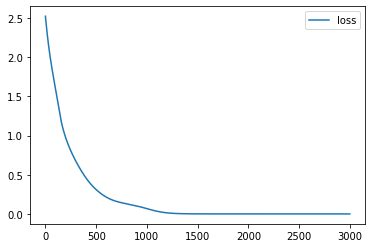

In [72]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.legend()

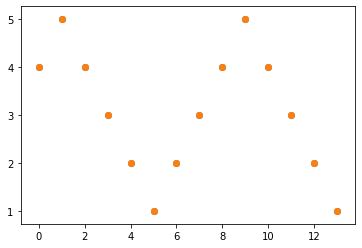

In [63]:
plt.scatter(np.arange(len(X)), model.predict(X), cmap = 'red')
plt.scatter(np.arange(len(X)), y)
plt.show()

In [64]:
model.get_weights()

[array([[ 0.55907327, -0.40454   ,  0.9163047 , -0.13108888, -0.96544164]],
       dtype=float32),
 array([[ 0.32373434,  1.1480553 ,  0.6107132 ,  1.3729322 , -1.1772437 ],
        [-1.258657  ,  0.03450891,  0.10056224, -0.5483988 , -0.08934703],
        [ 0.63657075, -0.760217  ,  1.1985751 ,  0.55826646,  1.7362869 ],
        [-0.4638297 ,  0.8505006 ,  0.5534527 ,  0.09398531,  0.19146653],
        [ 1.4023366 , -0.64150256, -0.4312113 , -0.17279477, -0.9000076 ]],
       dtype=float32),
 array([-1.1598685,  0.4586971, -0.4409444,  0.0914312,  0.5125761],
       dtype=float32),
 array([[ 0.8844184 ],
        [-1.4602076 ],
        [ 1.0103768 ],
        [ 0.8121863 ],
        [-0.88034445]], dtype=float32),
 array([0.42527685], dtype=float32)]

In [65]:
model.layers[1].get_weights()

[array([[ 0.55907327, -0.40454   ,  0.9163047 , -0.13108888, -0.96544164]],
       dtype=float32),
 array([[ 0.32373434,  1.1480553 ,  0.6107132 ,  1.3729322 , -1.1772437 ],
        [-1.258657  ,  0.03450891,  0.10056224, -0.5483988 , -0.08934703],
        [ 0.63657075, -0.760217  ,  1.1985751 ,  0.55826646,  1.7362869 ],
        [-0.4638297 ,  0.8505006 ,  0.5534527 ,  0.09398531,  0.19146653],
        [ 1.4023366 , -0.64150256, -0.4312113 , -0.17279477, -0.9000076 ]],
       dtype=float32),
 array([-1.1598685,  0.4586971, -0.4409444,  0.0914312,  0.5125761],
       dtype=float32)]

In [66]:
model.layers[2].get_weights()

[array([[ 0.8844184 ],
        [-1.4602076 ],
        [ 1.0103768 ],
        [ 0.8121863 ],
        [-0.88034445]], dtype=float32), array([0.42527685], dtype=float32)]

## Step 5: Predict 

In [67]:
Wx, Wh, bh = model.layers[1].get_weights()
print(Wx.shape, Wh.shape, bh.shape)
Wo, bo = model.layers[2].get_weights()
print(Wo.shape, bo.shape)

(1, 5) (5, 5) (5,)
(5, 1) (1,)


Let's select a sequence $[3,2,1]$.  We know next prediction would be 2

Make sure the input data is $N \times T \times D$

In [68]:
random_value = np.array([3,2,1])
random_value = random_value.reshape(1,-1,1)
print(random_value.shape)

(1, 3, 1)


In [69]:
random_value[0]

array([[3],
       [2],
       [1]])

In [73]:
h_last = np.zeros(M)
yhats = []

for t in range(T):
    h = np.tanh(random_value[0][t].dot(Wx) + h_last.dot(Wh) + bh)
    y = h.dot(Wo) + bo # we only care about this value on the last iteration
    yhats.append(y)

    # important: assign h to h_last
    h_last = h

print(yhats)
print(yhats[-1][0])
print("This is a prediction by manually")

[array([3.3957976]), array([2.21993012]), array([1.99995745])]
1.9999574494019436
This is a prediction by manually


In [75]:
print(model.predict(random_value))
print("This is a predicton by tensorflow")

[[1.9999578]]
This is a predicton by tensorflow
